<a href="https://colab.research.google.com/github/deboradcm/IARTES/blob/master/02_Regress%C3%A3o_Linear_OCDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Para organizar os dados.**

In [1]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]


**Vamos começar a partir daqui**


In [2]:
# Importando bibliotecas necessárias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

In [7]:
# Carregue os dados utilizando as bases disponibilizadas no Colabweb
oecd_bli = pd.read_csv("/content/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("/content/gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")




In [9]:
# Verifique os dados
print (oecd_bli.shape)  #retorna uma tupla com o número de linhas e colunas
print (gdp_per_capita.shape)
print (oecd_bli.head(3)) #imprime as três primeiras linhas do DataFrame
print (gdp_per_capita.head(3))

(3292, 17)
(190, 7)
  LOCATION    Country INDICATOR                           Indicator MEASURE  \
0      AUS  Australia   HO_BASE  Dwellings without basic facilities       L   
1      AUT    Austria   HO_BASE  Dwellings without basic facilities       L   
2      BEL    Belgium   HO_BASE  Dwellings without basic facilities       L   

  Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
0   Value        TOT      Total        PC  Percentage               0   
1   Value        TOT      Total        PC  Percentage               0   
2   Value        TOT      Total        PC  Percentage               0   

  PowerCode  Reference Period Code  Reference Period  Value Flag Codes  \
0     units                    NaN               NaN    1.1          E   
1     units                    NaN               NaN    1.0        NaN   
2     units                    NaN               NaN    2.0        NaN   

             Flags  
0  Estimated value  
1              NaN  
2         

In [10]:

# Prepare os dados
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print (country_stats)


                 GDP per capita  Life satisfaction
Country                                           
Russia                 9054.914                6.0
Turkey                 9437.372                5.6
Hungary               12239.894                4.9
Poland                12495.334                5.8
Slovak Republic       15991.736                6.1
Estonia               17288.083                5.6
Greece                18064.288                4.8
Portugal              19121.592                5.1
Slovenia              20732.482                5.7
Spain                 25864.721                6.5
Korea                 27195.197                5.8
Italy                 29866.581                6.0
Japan                 32485.545                5.9
Israel                35343.336                7.4
New Zealand           37044.891                7.3
France                37675.006                6.5
Belgium               40106.632                6.9
Germany               40996.511

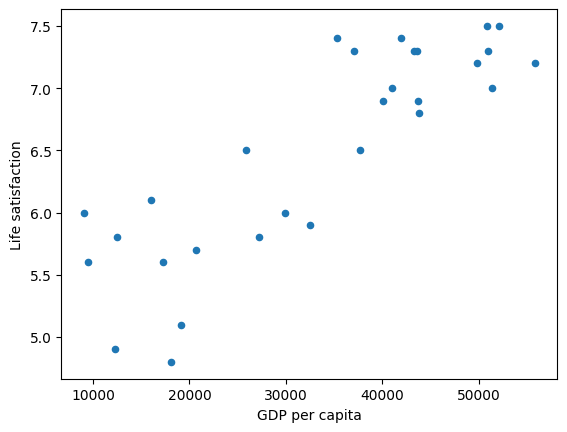

In [11]:
# Visualização dos dados
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
# Selecionando um modelo linear
model = LinearRegression() #cria uma instância do modelo de regressão linear. model é agora um objeto que representa o modelo de regressão linear

# Treinando o modelo
model.fit(X, y)  #treina o modelo utilizando os dados de treinamento


LinearRegression()

In [15]:
#Verificar os parâmetros do modelo
t0, t1 = model.intercept_[0], model.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158484e-05)

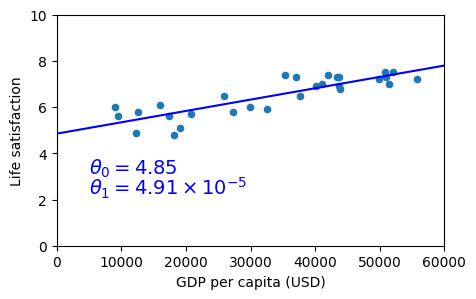

In [16]:
# Visualização do modelo gerado
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.show()



In [18]:
# Fazendo uma predição para o Chipre
X_novo = [[22587]]

print (model.predict(X_novo)) #retorna as previsões do modelo para os dados fornecidos

[[5.96242338]]
